In [75]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [77]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [78]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

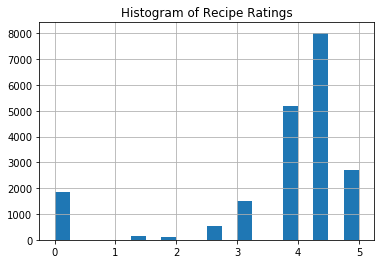

In [79]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [80]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [81]:
# How can they tell that not everything has the nutrition labeled?
# It is because the list is nulls so therefore there they do not exist.

In [82]:
from sklearn.svm import SVC
svc = SVC()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', '#cakeweek', '#wasteless',
               '30 days of groceries', 'alabama', 'alaska', 'alcoholic', 'anniversary', 'anthony bourdain',
                   'aperitif', 'arizona', 'aspen', 'atlanta',  'australia', 'back to school', 'backyard bbq', 
                   'bastille day', 'beverly hills', 'birthday', 'bon app��tit','boston', 'brooklyn', 'bulgaria', 
                   'california', 'chicago', 'christmas','christmas eve', 'cinco de mayo', 'cocktail', 'cocktail party', 
                   'colorado',  'columbus', 'connecticut', 'cook like a diner', 'cookbook critic', 'costa mesa', 
                  'cr��me de cacao', 'cuba', 'dallas', 'date', 'denver', 'digestif', 'diwali', 'dominican republic',
                   'dorie greenspan', 'easter', 'eau de vie', 'edible gift', 'egypt', 'emeril lagasse',
                  'engagement party', 'england', 'entertaining', 'epi + ushg', 'epi loves the microwave',
                  'fall', 'family reunion', "father's day", 'flaming hot summer', 'florida', 'fourth of july', 'france',
                   'frangelico', 'friendsgiving', 'game', 'georgia', 'germany', 'gourmet', 'graduation', 'guam', 'haiti',
                  'halloween', 'hanukkah', 'hawaii','healdsburg', 'hollywood', 'houston', 'ice cream machine', 'idaho',
                  'illinois', 'indiana', 'iowa', 'ireland', 'israel', 'italy', 'jamaica', 'japan', 'kansas','kansas city',
                   'kentucky', 'kentucky derby', 'kid-friendly', 'kidney friendly', 'kitchen olympics', 'kosher for passover',
                   'labor day', 'lancaster', 'las vegas', 'london', 'long beach', 'los angeles', 'louisiana', 'louisville',
                   'maine', 'mandoline', 'mardi gras', 'maryland', 'massachusetts', 'mexico', 'mezcal', 'miami','michigan',
                   'minneapolis', 'minnesota', 'mississippi', 'missouri', "mother's day", 'nancy silverton', 'nebraska',
                   'new hampshire', 'new jersey', 'new mexico', 'new orleans', "new year's day", "new year's eve", 'new york', 
                   'no meat, no problem', 'no sugar added', 'no-cook', 'non-alcoholic', 'north carolina', 'ohio', 'oklahoma',
                   'oktoberfest','oregon', 'oscars', 'pacific palisades','paris', 'pasadena','passover', 'pennsylvania',
                   'persian new year', 'philippines', 'picnic', 'pittsburgh',  'poker/game night', 'portland', 'providence',
                   'quick & easy',  'quick and healthy', 'ramadan', 'ramekin', 'rhode island', 'rosh hashanah/yom kippur',
                   'san francisco', 'sandwich theory', 'santa monica', 'seattle', 'shower', 'south carolina',  'st. louis', 
                   "st. patrick's day", 'super bowl', 'summer', 'suzanne goin', 'switzerland', 'tennessee', 'texas',
                   'utah', "valentine's day", 'vegetarian', 'vermont', 'virginia', 'washington', 'washington, d.c.',
                   'west virginia', 'westwood', 'wheat/gluten-free', 'windsor', 'winter', 'wisconsin', 'yonkers', 'yuca',
                   'leftovers', 'snack', 'snack week', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 
                   'advance prep required', 'almond', 'amaretto', 'anchovy', 'anise', 'appetizer', 'apple', 'apple juice', 
                   'apricot', 'artichoke', 'arugula', 'asian pear', 'asparagus', 'avocado', 'bake', 'banana', 'barley',
                   'bass', 'bean', 'beef rib', 'beef shank', 'beef tenderloin', 'beet', 'bell pepper', 'berry', 'biscuit', 
                   'bitters', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 'bok choy', 'bon appétit', 
                   'bourbon', 'braise', 'bran', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brie', 'brine', 'brisket',
                   'broccoli', 'broccoli rabe', 'broil', 'brown rice', 'brownie', 'brunch', 'brussel sprout', 'buffalo', 
                   'buffet', 'bulgur', 'burrito', 'butter', 'buttermilk', 'butternut squash', 'butterscotch/caramel', 
                   'cabbage', 'cake', 'calvados', 'cambridge', 'campari', 'camping', 'canada', 'candy', 'candy thermometer',
                   'cantaloupe', 'capers', 'caraway', 'cardamom', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 
                   'caviar', 'celery', 'chambord', 'champagne', 'chard', 'chartreuse', 'cheddar', 'cheese', 'cherry', 
                   'chestnut', 'chickpea', 'chile', 'chile pepper', 'chill', 'chocolate', 'cilantro', 'citrus', 'clam', 
                   'clove', 'cobbler/crumble', 'coconut', 'cod', 'coffee', 'coffee grinder', 'cognac/armagnac', 
                   'collard greens', 'condiment', 'condiment/spread', 'cookie', 'cookies', 'corn',  'cornmeal', 
                   'cottage cheese', 'couscous', 'crab', 'cranberry', 'cranberry sauce', 'cream cheese', 'créme de cacao',
                   'crêpe', 'cucumber', 'cupcake', 'currant', 'custard', 'dairy', 'dairy free',  'deep-fry', 'dessert',
                   'dinner', 'dip', 'double boiler', 'dried fruit', 'drink', 'drinks', 'duck', 'egg', 'egg nog', 'eggplant',
                   'endive', 'escarole', 'fat free', 'feta', 'fig', 'fish', 'flat bread', 'fontina', 'food processor', 
                   'fortified wine', 'frankenrecipe', 'freeze/chill', 'freezer food', 'frittata', 'fritter', 'frozen dessert',
                   'fruit', 'fruit juice', 'fry', 'gin', 'goat cheese', 'goose', 'gouda', 'grains', 'grand marnier', 'granola',
                   'grape', 'grapefruit', 'grappa', 'green bean', 'green onion/scallion', 'grill', 'grill/barbecue', 
                   'ground beef', 'ground lamb', 'guava', 'healthy', 'high fiber', 'hominy/cornmeal/masa', 'honey', 'honeydew',
                   "hors d'oeuvre", 'horseradish', 'hot drink', 'hot pepper', 'house & garden', 'house cocktail', 'hummus',
                   'ice cream', 'iced coffee', 'iced tea', 'jalapeño', 'jam or jelly', 'jerusalem artichoke', 'juicer',
                   'jícama', 'kahlúa', 'kale', 'kirsch', 'kiwi', 'kosher', 'kumquat', 'kwanzaa', 'lamb', 'lamb chop',
                   'lamb shank', 'lasagna', 'leafy green', 'leek', 'legume', 'lemon', 'lemon juice', 'lentil', 'lettuce',
                   'lima bean', 'lime', 'lime juice', 'lingonberry', 'liqueur', 'lobster', 'low cal', 'low carb',
                   'low cholesterol', 'low fat', 'low sodium', 'low sugar', 'low/no sugar', 'lunar new year', 'lunch',
                   'lychee', 'macadamia nut', 'macaroni and cheese', 'mango', 'maple syrup', 'margarita', 'marinade',
                   'marinate', 'marsala', 'marscarpone', 'marshmallow', 'martini', 'mayonnaise', 'meat', 'meatball',
                   'meatloaf', 'melon', 'microwave', 'midori', 'milk/cream', 'mixer', 'molasses', 'monterey jack',
                   'mortar and pestle', 'mozzarella', 'muffin', 'mushroom', 'mussel', 'mustard', 'mustard greens', 'nectarine',
                   'noodle', 'nut', 'oat',  'oatmeal', 'octopus', 'okra', 'olive', 'omelet', 'one-pot meal', 'onion', 'orange',
                   'orange juice', 'organic', 'orzo', 'oyster', 'paleo', 'pan-fry', 'pancake', 'papaya', 'parade', 'parmesan',
                   'party', 'passion fruit', 'pasta', 'pasta maker', 'pastry', 'pea', 'peach', 'peanut', 'peanut butter',
                   'peanut free', 'pear', 'pecan', 'pernod', 'persimmon', 'peru', 'pescatarian', 'phyllo/puff pastry dough',
                   'pickles', 'pie', 'pine nut', 'pineapple', 'pistachio', 'pizza', 'plantain', 'plum', 'poach', 'poblano',
                   'pomegranate', 'pomegranate juice','poppy', 'pork', 'pork chop', 'pork rib', 'pork tenderloin', 'port',
                   'pot pie', 'potato salad', 'potluck', 'poultry', 'poultry sausage', 'pressure cooker', 'prosciutto', 
                   'prune', 'pumpkin', 'punch', 'purim', 'quail', 'quiche', 'quince', 'quinoa', 'rabbit', 'rack of lamb',
                   'radicchio', 'radish', 'raisin', 'raspberry', 'raw', 'red wine', 'rhubarb', 'rice', 'ricotta', 'roast',
                   'root vegetable', 'rosé', 'rub', 'rum', 'rutabaga', 'rye','sake', 'salad', 'salad dressing',
                   'salmon', 'salsa', 'sandwich', 'sangria', 'sardine', 'sauce', 'sausage', 'sauté', 'scallop', 'scotch',
                   'seafood','seed', 'self', 'semolina', 'sesame', 'sesame oil', 'shallot', 'shavuot', 'shellfish', 'sherry',
                   'shrimp', 'side', 'simmer', 'skewer', 'slow cooker', 'smoker', 'smoothie', 'snapper', 'sorbet',
                   'soufflé/meringue', 'soup/stew', 'sour cream', 'sourdough','soy', 'soy free', 'soy sauce', 'spain',
                   'sparkling wine', 'spice', 'spinach', 'spirit', 'spring', 'spritzer', 'squash', 'squid', 'steak', 'steam',
                   'stew', 'stir-fry', 'stock', 'strawberry', 'stuffing/dressing', 'sugar conscious', 'sugar snap pea',
                   'sukkot', 'sweet potato/yam', 'swiss cheese', 'swordfish', 'taco', 'tailgating', 'tamarind', 'tangerine',
                   'tapioca', 'tarragon', 'tart', 'tea', 'tequila', 'tested & improved', 'thanksgiving', 'tilapia', 'tofu',
                   'tomatillo', 'tomato', 'tortillas', 'tree nut', 'tree nut free', 'triple sec', 'tropical fruit', 'trout', 
                   'tuna', 'turnip', 'vanilla', 'veal', 'vegan', 'vegetable', 'venison', 'vermouth', 'vinegar', 'vodka',
                   'waffle', 'walnut', 'wasabi', 'watercress', 'watermelon', 'wedding', 'weelicious', 'white wine',
                   'whole wheat', 'wild rice', 'wine', 'wok', 'yellow squash', 'yogurt', 'zucchini', 'cookbooks', 
                   'turkey'], 1).sample(frac=0.3, replace=True, random_state=1)

Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
y_v1 = np.where(Y>=2.5, 1, 0) 
svc.fit(X,y_v1)

c:\users\rjourney\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [83]:
from sys import maxsize
from numpy import set_printoptions

Y #Anything 2.5>/= will be 1 & 2.4</= will be 0

y_v1 = np.where(Y>=2.5, 1, 0) 

pd.DataFrame({"Y":Y, "y_v1":y_v1})

,Y,y_v1
235,3.125,1
12172,3.750,1
5192,4.375,1
17289,4.375,1
10955,5.000,1
7813,5.000,1
19279,3.750,1
144,4.375,1
16332,5.000,1
7751,4.375,1


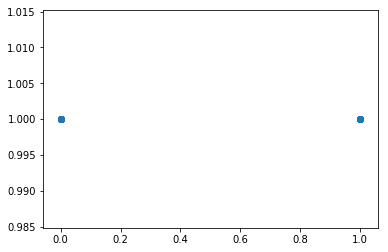

In [87]:
plt.scatter(y_v1, svc.predict(X))

In [88]:
svc.score(X, y_v1)

0.891123670212766

In [90]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, y_v1, cv=5)

c:\users\rjourney\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\rjourney\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\rjourney\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

array([0.89119601, 0.89110557, 0.89110557, 0.89110557, 0.89110557])

In [12]:
# Revisit heat maps and the correaltion of the variables
# An increase in one variable will lead to an increase in the other variable
# Binary classifier is yes/no (0 or 1). Turn it into a this such as anything above 2.5 or the like.